In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\AI&DS\Sem VI\Deep Learning\Lab\Insurance Or Not\\new_insurance_data.csv")

In [3]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


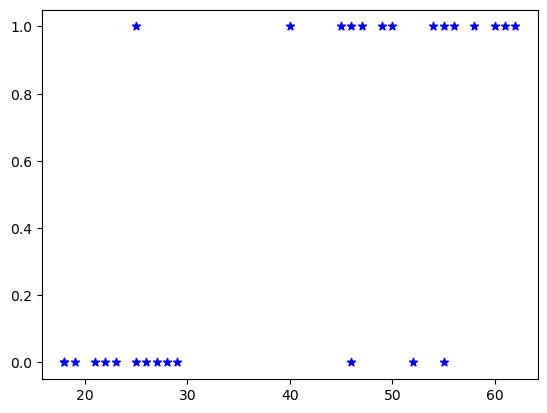

In [4]:
plt.scatter(df.age,df.bought_insurance, marker='*', color='blue')

In [5]:
df.shape

(28, 3)

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.8)

In [8]:
x_test

,age
12,27
11,28
22,40
24,50
0,22
19,18
6,55
4,46
9,61
26,23


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0], dtype=int64)

In [12]:
model.predict_proba(x_test)

array([[0.97268529, 0.02731471],
       [0.96372176, 0.03627824],
       [0.44102009, 0.55897991],
       [0.0404061 , 0.9595939 ],
       [0.99355438, 0.00644562],
       [0.99799497, 0.00200503],
       [0.00963394, 0.99036606],
       [0.11969444, 0.88030556],
       [0.00167363, 0.99832637],
       [0.9913785 , 0.0086215 ],
       [0.15416821, 0.84583179],
       [0.97948128, 0.02051872],
       [0.95196205, 0.04803795],
       [0.01287217, 0.98712783],
       [0.0072044 , 0.9927956 ],
       [0.02289601, 0.97710399],
       [0.11969444, 0.88030556],
       [0.00963394, 0.99036606],
       [0.98461316, 0.01538684],
       [0.99799497, 0.00200503],
       [0.05342969, 0.94657031],
       [0.09209012, 0.90790988],
       [0.98461316, 0.01538684]])

In [13]:
model.score(x_test,y_test)

0.8260869565217391

In [14]:
model.coef_

array([[0.29305063]])

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [16]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age']/100

In [18]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)


(5, 1)
(23, 1)


In [19]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,),activation='sigmoid', kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer="sgd", loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 10, verbose=1, validation_data = (x_test_scaled, y_test))

Epoch 1/10
1/1 [==============================] - 1s 775ms/step - loss: 0.5818 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 2/10
1/1 [==============================] - 0s 55ms/step - loss: 0.5817 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 3/10
1/1 [==============================] - 0s 44ms/step - loss: 0.5816 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 4/10
1/1 [==============================] - 0s 43ms/step - loss: 0.5816 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 5/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5815 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 6/10
1/1 [==============================] - 0s 42ms/step - loss: 0.5814 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 7/10
1/1 [==============================] - 0s 45ms/step - loss: 0.5814 - accuracy: 0.6000 - val_loss: 0.6798 - val_accuracy: 0.4783
Epoch 8/10
1/1 [==========

In [21]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(x_train, y_train)
print("L1 Regularized Accuracy:", model_l1.score(x_train_scaled, y_train))
print("L1 Coefficients:", model_l1.coef_)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(x_train, y_train)
print("L2 Regularized Accuracy:", model_l2.score(x_train_scaled, y_train))
print("L2 Coefficients:", model_l2.coef_)

L1 Regularized Accuracy: 0.6
L1 Coefficients: [[0.02913531]]
L2 Regularized Accuracy: 0.4
L2 Coefficients: [[0.04506764]]


We can see there is not much change in accuracy even after L1 and L2 regularization as the model is too simple and the dataset is very small